In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl


data = pd.read_csv('Hong Kong.csv', index_col="id")


freq_tbl(data)

  last_scraped  frequency  percentage  cumulative_perc
0   2024-09-21       3534    0.516893         0.516893
1   2024-09-20       3303    0.483107         1.000000

----------------------------------------------------------------

                                                   name  frequency  \
0                        One Bed - Mixed 4 Bedroom Dorm          8   
1                                             Twin room          7   
2                        「香港旺角地鐵站3分鐘」短期月租HKD6980旺角站私人房間          6   
3                        One Bed - Mixed 8 Bedroom Dorm          6   
4                                           Double room          6   
...                                                 ...        ...   
6328  ZA Newly renovate Private Rooftop &Balcony Tin...          1   
6329                Spacious&Cosy 2BR TST MTR (700sqft)          1   
6330  150 sq ft STUDIO, RUSSELL STREET, CAUSEWAY BAY HK          1   
6331                 STUDIO FOR SHORT STAY, TUNG STREET          1  

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6837 entries, 103760 to 1249249639484437125
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  6837 non-null   object 
 1   name                                          6837 non-null   object 
 2   host_id                                       6837 non-null   int64  
 3   host_name                                     6837 non-null   object 
 4   host_since                                    6837 non-null   object 
 5   host_response_time                            6837 non-null   object 
 6   host_is_superhost                             6837 non-null   object 
 7   host_identity_verified                        6837 non-null   object 
 8   neighbourhood                                 6837 non-null   object 
 9   neighbourhood_cleansed                        68

In [74]:
#Obtengo un analisis univariado de una variable categorica en especifico
table1 = freq_tbl(data['neighbourhood_cleansed'])
table1

,neighbourhood_cleansed,frequency,percentage,cumulative_perc
0,Yau Tsim Mong,2426,0.354834,0.354834
1,Wan Chai,1473,0.215445,0.570279
2,Central & Western,1300,0.190142,0.760421
3,Islands,385,0.056311,0.816732
4,Eastern,301,0.044025,0.860758
5,Kowloon City,242,0.035396,0.896153
6,Sham Shui Po,171,0.025011,0.921164
7,Southern,144,0.021062,0.942226
8,Sai Kung,102,0.014919,0.957145
9,Yuen Long,56,0.008191,0.965336


In [75]:
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

,neighbourhood_cleansed,frequency
0,Yau Tsim Mong,2426
1,Wan Chai,1473
2,Central & Western,1300
3,Islands,385
4,Eastern,301
5,Kowloon City,242
6,Sham Shui Po,171
7,Southern,144
8,Sai Kung,102
9,Yuen Long,56


In [76]:
Filtro_index = table2.set_index('neighbourhood_cleansed')
Filtro_index

,frequency
neighbourhood_cleansed,
Yau Tsim Mong,2426
Wan Chai,1473
Central & Western,1300
Islands,385
Eastern,301
Kowloon City,242
Sham Shui Po,171
Southern,144
Sai Kung,102


<Axes: ylabel='frequency'>

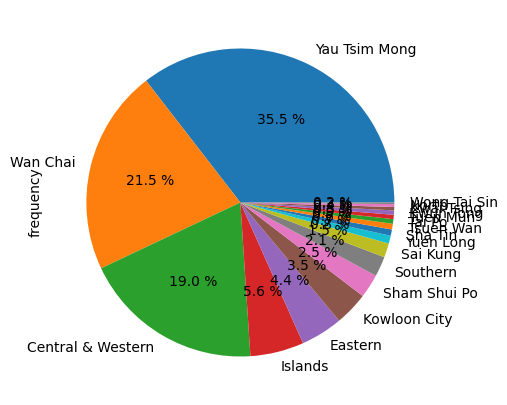

In [77]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=False, autopct='%0.1f %%')

(array([0, 1]), [Text(0, 0, '2024-09-21'), Text(1, 0, '2024-09-20')])

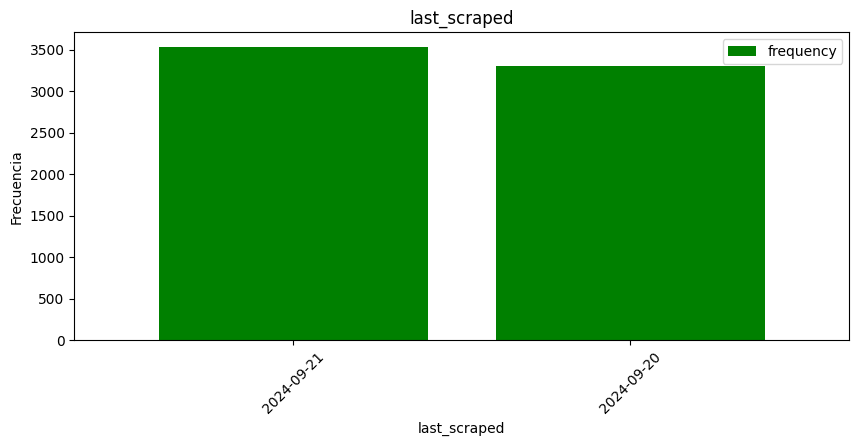

In [78]:
table1 = freq_tbl(data['last_scraped'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)

#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('last_scraped')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='green')
plt.title('last_scraped')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

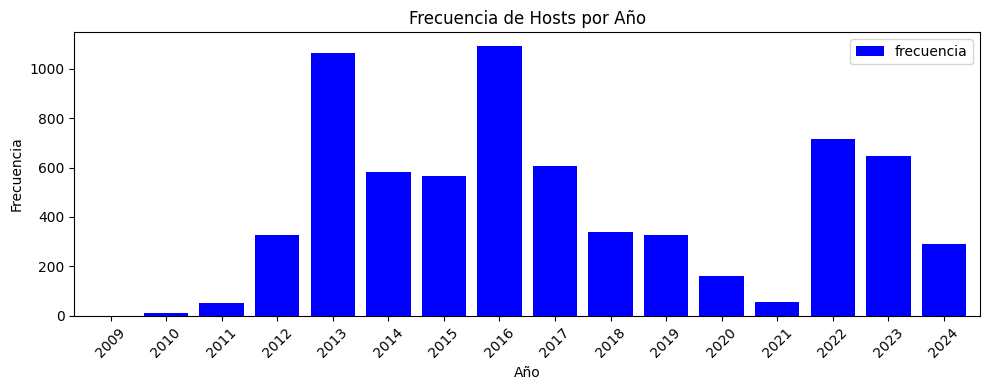

In [82]:
# convertirla a formato datetime
if 'host_since' in data.columns:
    data['host_since'] = pd.to_datetime(data['host_since'])  # Convertimos a datetime

# Agrupar por una unidad de tiempo (por ejemplo, mes o año)
# Agrupamos por año para obtener la frecuencia de hosts registrados por año
table1 = data['host_since'].dt.to_period('Y').value_counts().reset_index()
table1.columns = ['host_since', 'frecuencia']  # Renombrar columnas
table1 = table1.sort_values('host_since')  # Ordenar cronológicamente

# Ajustar el índice al DataFrame
Filtro_index = table1.set_index('host_since')

# Gráfica de barras
Filtro_index.plot(kind='bar', width=0.8, figsize=(10, 4), color='blue')
plt.title('Frecuencia de Hosts por Año')
plt.ylabel('Frecuencia')
plt.xlabel('Año')
plt.xticks(rotation=45)  # Girar etiquetas para mejor lectura
plt.tight_layout()  # Ajustar diseño
plt.show()

             amenity  count
6               Wifi   6466
49  Air conditioning   6081
12           Kitchen   4599
21           Hangers   3882
64                TV   3725


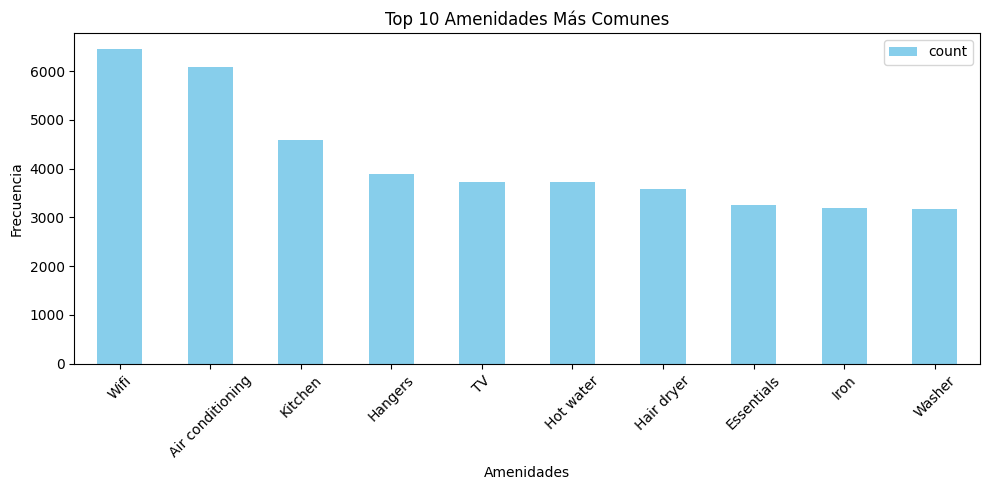

In [34]:
from collections import Counter
import ast

# Convertir cadenas de texto a listas reales (si están en formato string como JSON)
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Combinar todas las listas de amenities
all_amenities = sum(data['amenities'], [])

# Contar la frecuencia de cada amenidad
amenities_count = Counter(all_amenities)

# Convertir a DataFrame para análisis más cómodo
amenities_df = pd.DataFrame(amenities_count.items(), columns=['amenity', 'count']).sort_values(by='count', ascending=False)
print(amenities_df.head())

# Seleccionar las 10 amenidades más comunes
top_amenities = amenities_df.head(10)

# Graficar
top_amenities.plot(kind='bar', x='amenity', y='count', color='skyblue', figsize=(10, 5))
plt.title('Top 10 Amenidades Más Comunes')
plt.ylabel('Frecuencia')
plt.xlabel('Amenidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
table1 = freq_tbl(data['calendar_last_scraped'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2


,calendar_last_scraped,frequency
0,2024-09-21,3534
1,2024-09-20,3303


(array([0, 1]), [Text(0, 0, '2024-09-21'), Text(1, 0, '2024-09-20')])

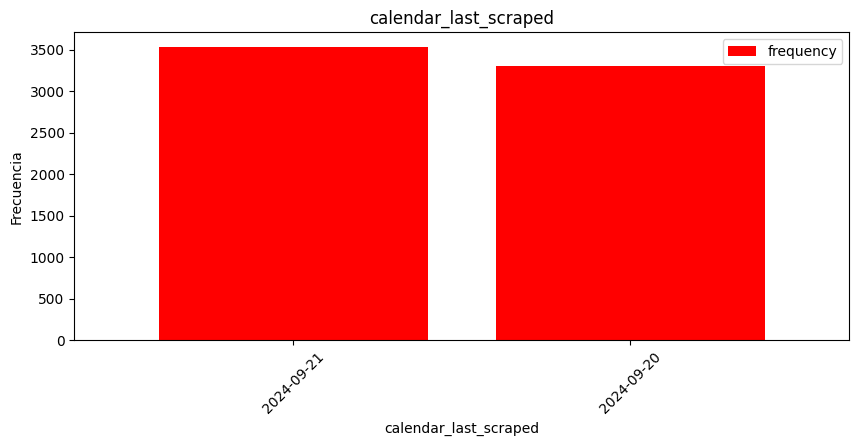

In [45]:
#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('calendar_last_scraped')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='red')
plt.title('calendar_last_scraped')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)


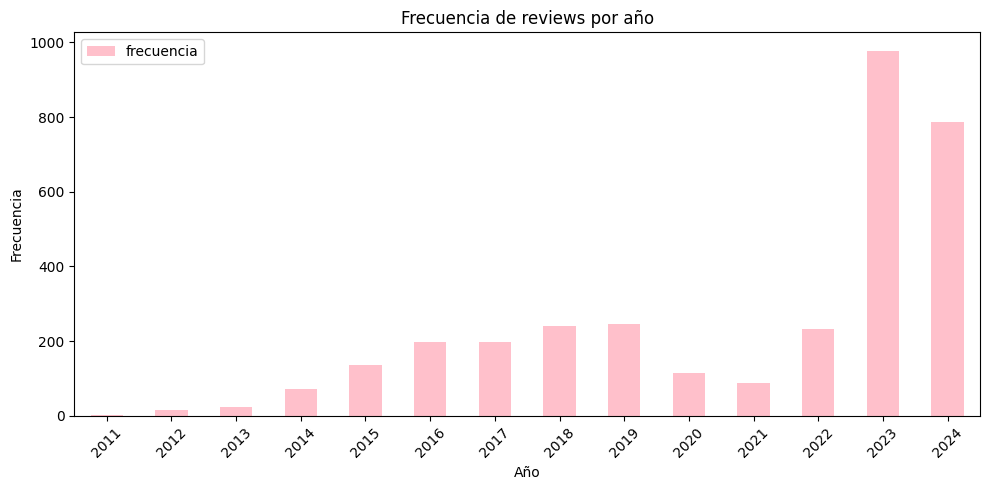

In [ ]:
data['first_review'] = pd.to_datetime(data['first_review'], errors='coerce')

# Agrupar por año y contar las frecuencias
table1 = data['first_review'].dt.to_period('Y').value_counts().reset_index()
table1.columns = ['first_review', 'frecuencia']  # Renombrar columnas
table1 = table1.sort_values('first_review')  # Ordenar cronológicamente

# Graficar los datos
table1.plot(x='first_review', y='frecuencia', kind='bar', figsize=(10, 5), color='pink')
plt.title('Frecuencia de reviews por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

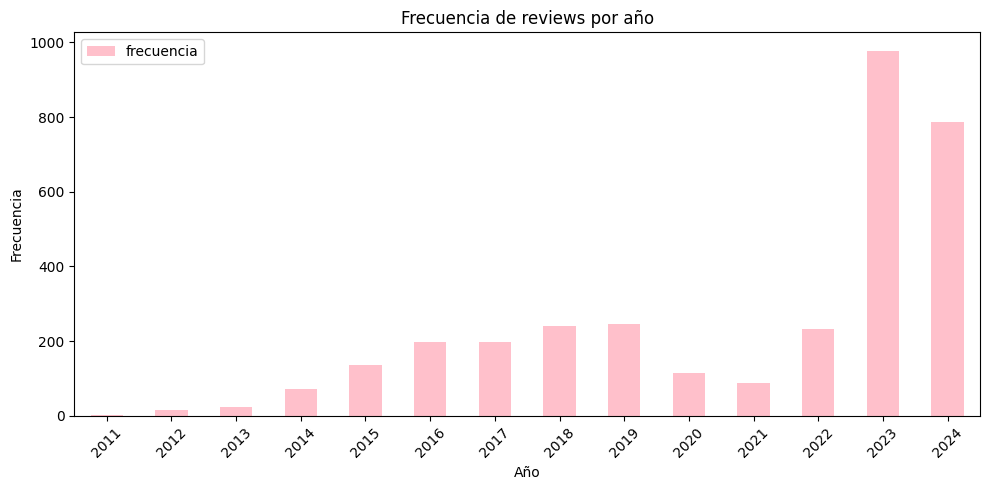

In [60]:
data['last_review'] = pd.to_datetime(data['first_review'], errors='coerce')

# Agrupar por año y contar las frecuencias
table1 = data['last_review'].dt.to_period('Y').value_counts().reset_index()
table1.columns = ['last_review', 'frecuencia']  # Renombrar columnas
table1 = table1.sort_values('last_review')  # Ordenar cronológicamente

# Graficar los datos
table1.plot(x='last_review', y='frecuencia', kind='bar', figsize=(10, 5), color='pink')
plt.title('Frecuencia de reviews por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x210c1e49be0>,
 [Text(0, 0, 'Sí (t)'), Text(1, 0, 'No (f)')])

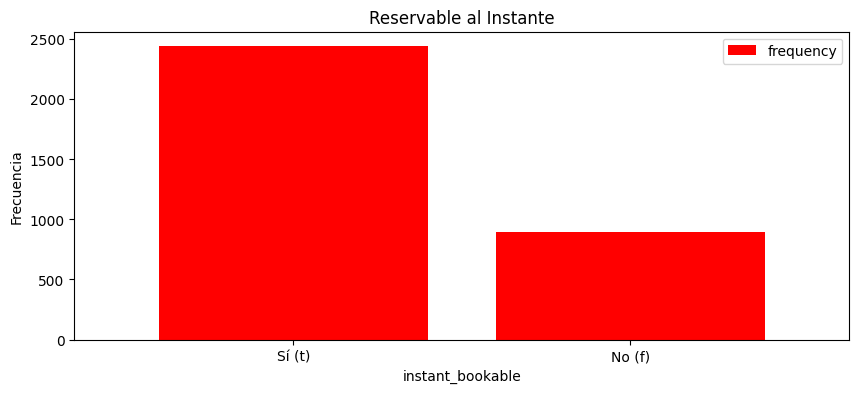

In [68]:
table1 = freq_tbl(data['instant_bookable'])
table2 = table1.drop(['percentage', 'cumulative_perc'], axis = 1)
table2

#Ajusto el indice de mi dataframe 
Filtro_index = table2.set_index('instant_bookable')
Filtro_index

Filtro_index.plot(kind='bar', width=0.8, figsize=(10,4), color='red')
plt.title('Reservable al Instante')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Sí (t)', 'No (f)'], rotation=0)

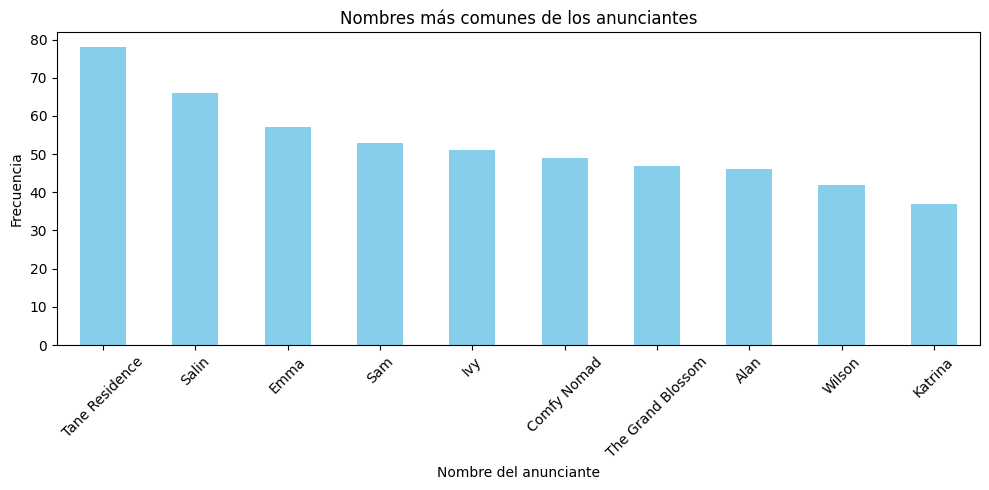

In [71]:
# Contar cuántos nombres únicos existen
unique_names = data['host_name'].nunique()
#print(f"\nNombres únicos: {unique_names}")

# Contar la frecuencia de cada nombre
name_counts = data['host_name'].value_counts()
#print("\nNombres más comunes y sus frecuencias:")
#print(name_counts.head(10))

# Graficar los 10 nombres más comunes
plt.figure(figsize=(10, 5))
name_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Nombres más comunes de los anunciantes')
plt.xlabel('Nombre del anunciante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
